<a href="https://colab.research.google.com/github/sadaqatali1234/Deep-learning-assigments/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
# libaries importing
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import os
from os.path import join
import cv2
import pandas as pd


In [ ]:
#data loading
data = "/content/drive/MyDrive/flowers/flowers"

# List out the directories inside the main input folder

folders = os.listdir(data)

print(folders)

['rose', 'sunflower', 'tulip', 'daisy', 'dandelion']


In [ ]:
# pictures loading and resizing
image_names = []
labels = []
data_images = []


size = 28,28

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            im = cv2.resize(img,size)
            data_images.append(im)
        else:
            continue

In [ ]:
# label encoding
label_dummies = pd.get_dummies(labels)

labels =  label_dummies.values.argmax(1)

In [ ]:
# labels unique values
pd.unique(labels)

array([2, 3, 4, 0, 1])

In [ ]:
# convet label and data into numpy array
labels=np.asarray(labels).astype("float32")
data = np.asarray(data_images).astype("float32")/255.0

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.40,random_state=1)

In [ ]:
# model buiding
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

mymodel =Sequential()
mymodel.add(Conv2D(8, (1,1),input_shape=(28, 28, 3),activation='relu'))
mymodel.add(MaxPool2D(pool_size=(1,1)))
mymodel.add(Conv2D(16, (1,1),activation='relu'))
mymodel.add(MaxPool2D(pool_size=(2,2)))
mymodel.add(Flatten())
mymodel.add(Dense(128,activation='relu'))
mymodel.add(Dense(10,activation="softmax"))


In [ ]:
#model summary
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        144       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
#model compiling
mymodel.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size = 1
epochs = 20
history=mymodel.fit(X_train, y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/20
2593/2593 [==============================] - 8s 2ms/step - loss: 1.4400 - accuracy: 0.3899
Epoch 2/20
2593/2593 [==============================] - 5s 2ms/step - loss: 1.0166 - accuracy: 0.6047
Epoch 3/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.8795 - accuracy: 0.6665
Epoch 4/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.7689 - accuracy: 0.7097
Epoch 5/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.6372 - accuracy: 0.7553
Epoch 6/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.5496 - accuracy: 0.8050
Epoch 7/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.4608 - accuracy: 0.8333
Epoch 8/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.3694 - accuracy: 0.8609
Epoch 9/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.3124 - accuracy: 0.8885
Epoch 10/20
2593/2593 [==============================] - 5s 2ms/step - loss: 0.213

In [ ]:
mymodel.evaluate(X_test,y_test)

55/55 [==============================] - 0s 3ms/step - loss: 2.4021 - accuracy: 0.6110


[2.4021308422088623, 0.6109826564788818]

In [ ]:
pred = mymodel.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

1 ==> 1.0
1 ==> 3.0
0 ==> 0.0
4 ==> 4.0
4 ==> 4.0
0 ==> 0.0
3 ==> 4.0
1 ==> 1.0
2 ==> 4.0
1 ==> 4.0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


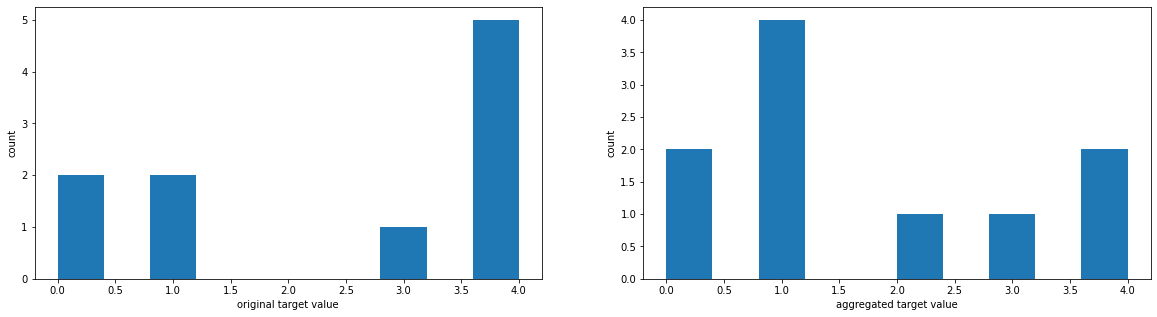

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test[:10])
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()